In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import joblib

from catboost import CatBoostClassifier

from sklearn.utils.class_weight import compute_class_weight


In [2]:
df = pd.read_csv("/workspaces/Final_Project_DataScient/data/processed/datafinal.csv")
df

,HHADULT,SEXVAR,MEDCOST1,SLEPTIM1,CVDSTRK3,ADDEPEV3,DIABETE4,MARITAL,RENTHOM1,VETERAN3,...,_ASTHMS1,_DRDXAR2,_AGEG5YR,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG1,_RFBING6,_AIDTST4,tobacco_use
0,2,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,8.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0
1,4,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,8.0,2.0,0.0,3.0,-1.0,0.0,0.0,0.0
2,2,1.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,1.0,6.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2,0.0,0.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,3.0,0.0,2.0,5.0,0.0,0.0,0.0
4,2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,8.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109974,1,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,8.0,2.0,0.0,2.0,5.0,1.0,0.0,1.0
109975,4,0.0,0.0,7.0,1.0,0.0,3.0,0.0,1.0,0.0,...,3.0,1.0,9.0,2.0,0.0,3.0,5.0,0.0,1.0,0.0
109976,2,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,6.0,2.0,1.0,3.0,4.0,0.0,1.0,0.0
109977,1,1.0,1.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.0,0.0,9.0,0.0,0.0,1.0,-1.0,-1.0,0.0,2.0


In [3]:
columnas = df.columns
columnas
for col in columnas:
    df = df[df[col] != -1]

In [4]:
X = df.drop("ADDEPEV3", axis=1)
y = df["ADDEPEV3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# Cálculo de pesos de clases
# ------------------------------------------------------------------------------
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print("Pesos de clases :", class_weights)


Pesos de clases : {np.float64(0.0): np.float64(0.6296590169270834), np.float64(1.0): np.float64(2.4281343166483604)}


In [6]:
def show_metrics(y_test, y_pred_test, y_train, y_pred_train):    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_score_test = f1_score(y_test, y_pred_test)
    f1_score_train = f1_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)

    print("\nRESULTADOS DEL MODELO")
    print("=" * 50)
    print(f"{'Métrica':<15} {'Test':<10} {'Train':<10}")
    print("-" * 50)
    print(f"{'Accuracy':<15} {accuracy_test:<10.2f} {accuracy_train:<10.2f}")
    print(f"{'F1 Score':<15} {f1_score_test:<10.2f} {f1_score_train:<10.2f}")
    print(f"{'Precision':<15} {precision_test:<10.2f} {precision_train:<10.2f}")
    print(f"{'Recall':<15} {recall_test:<10.2f} {recall_train:<10.2f}")
    print("=" * 50)


    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Graph the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title('Matriz de Confusión')
    plt.show()

In [7]:
initial_catboost = CatBoostClassifier(
    learning_rate=0.044,
    l2_leaf_reg=3,
    iterations=300,
    depth=6,
    custom_metric=['Precision'],
    early_stopping_rounds=20,
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

initial_catboost.fit(X_train, y_train)


RESULTADOS DEL MODELO
Métrica         Test       Train     
--------------------------------------------------
Accuracy        0.79       0.80      
F1 Score        0.57       0.59      
Precision       0.49       0.51      
Recall          0.70       0.72      


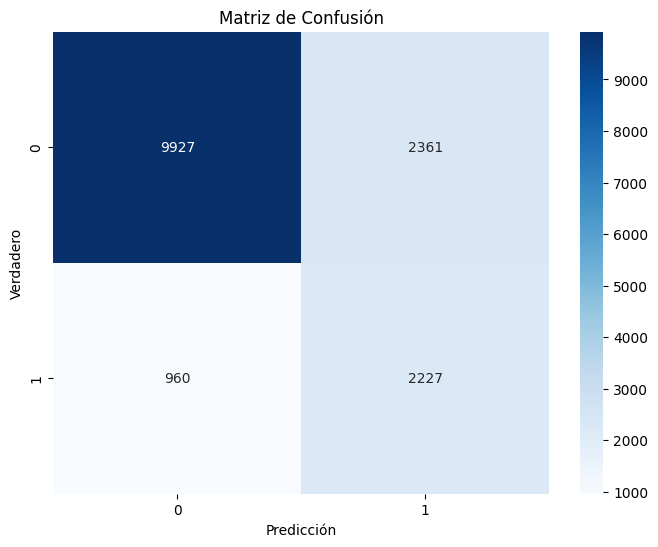

In [8]:
y_pred_test = initial_catboost.predict_proba(X_test)[:, 1]
y_pred_train = initial_catboost.predict_proba(X_train)[:, 1]

threshold = 0.54
y_pred_test_threshold = (y_pred_test >= threshold).astype(int)
y_pred_train_threshold = (y_pred_train >= threshold).astype(int)

show_metrics(y_test, y_pred_test_threshold, y_train, y_pred_train_threshold)

In [9]:
importancia = initial_catboost.get_feature_importance()
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Crear un DataFrame para organizarlo
importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

        Feature  Importance
24     _MENT14D   26.750903
10       DECIDE    9.403393
1        SEXVAR    7.552812
17     SDHISOLT    4.529853
30     _AGEG5YR    4.094119
29     _DRDXAR2    4.043517
15     LSATISFY    3.814405
33      _EDUCAG    3.718269
3      SLEPTIM1    3.649840
9       EMPLOY1    2.843934
23     _PHYS14D    2.822744
31     _BMI5CAT    2.622641
6       MARITAL    2.466169
36     _AIDTST4    2.464320
28     _ASTHMS1    2.284585
34     _INCOMG1    2.049335
37  tobacco_use    1.253282
32     _CHLDCNT    1.249587
7      RENTHOM1    1.197340
25     _HLTHPLN    1.177351
5      DIABETE4    1.094086
11     DIFFALON    1.060015
26     _TOTINDA    1.036100
0       HHADULT    1.000326
19     SDHFOOD1    0.935673
14     COVIDPOS    0.772145
13     HIVRISK5    0.713736
27       _MICHD    0.657880
8      VETERAN3    0.618104
35     _RFBING6    0.484589
18     SDHEMPLY    0.325054
12     COLNCNCR    0.319931
16     EMTSUPRT    0.196152
22     SDHTRNSP    0.185916
21     SDHUTILS    0

In [10]:
# Tomamos todas las variables con importancia por encima del 2%
variables_importantes = [
    "_MENT14D",
    "DECIDE",
    "SEXVAR",
    "SDHISOLT",
    "_AGEG5YR",
    "_DRDXAR2",
    "LSATISFY",
    "_EDUCAG",
    "SLEPTIM1",
    "EMPLOY1",
    "_PHYS14D",
    "_BMI5CAT",
    "MARITAL",
    "_AIDTST4",
    "_ASTHMS1",
    "_INCOMG1"
]


In [11]:
X_train_imp = X_train[variables_importantes]
X_test_imp = X_test[variables_importantes]

In [12]:
final_catboost = CatBoostClassifier(
    learning_rate=0.044,
    l2_leaf_reg=3,
    iterations=300,
    depth=6,
    custom_metric=['Precision'],
    early_stopping_rounds=20,
    verbose=0,
    random_state=42,
    class_weights=class_weights
)

final_catboost.fit(X_train_imp, y_train)


RESULTADOS DEL MODELO
Métrica         Test       Train     
--------------------------------------------------
Accuracy        0.78       0.79      
F1 Score        0.57       0.59      
Precision       0.48       0.50      
Recall          0.70       0.72      


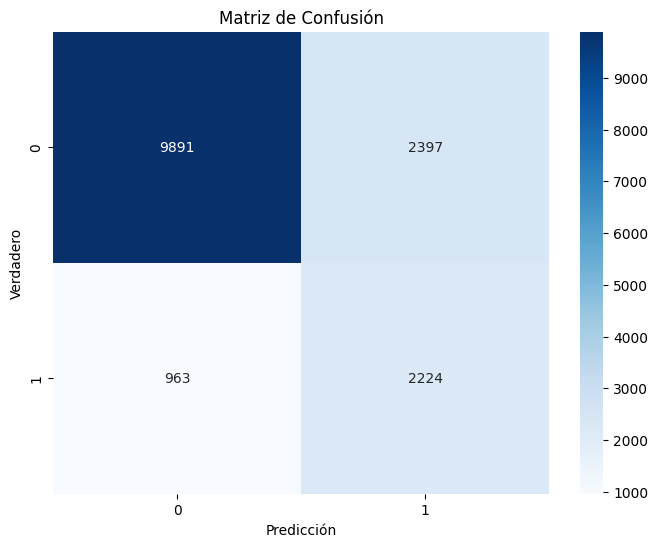

In [13]:
y_pred_test = final_catboost.predict_proba(X_test_imp)[:, 1]
y_pred_train = final_catboost.predict_proba(X_train_imp)[:, 1]

threshold = 0.54
y_pred_test_threshold = (y_pred_test >= threshold).astype(int)
y_pred_train_threshold = (y_pred_train >= threshold).astype(int)

show_metrics(y_test, y_pred_test_threshold, y_train, y_pred_train_threshold)

In [14]:
X_test_imp.columns

Index(['_MENT14D', 'DECIDE', 'SEXVAR', 'SDHISOLT', '_AGEG5YR', '_DRDXAR2',
       'LSATISFY', '_EDUCAG', 'SLEPTIM1', 'EMPLOY1', '_PHYS14D', '_BMI5CAT',
       'MARITAL', '_AIDTST4', '_ASTHMS1', '_INCOMG1'],
      dtype='object')

In [15]:
# Guardar el modelo entrenado en la carpeta models/
joblib.dump(final_catboost, "../models/modelo_catboost.pkl")

['../models/modelo_catboost.pkl']

In [16]:
# Prediccion de dato nuevo
new_data = [0, 0, 1, 0, 8, 0, 0, 3, 6, 0, 0, 1, 0, 0, 3, 4]

y_pred_new = final_catboost.predict_proba([new_data])[:, 1]

threshold = 0.54
y_pred_new_threshold = (y_pred_new >= threshold).astype(int)

y_pred_new_threshold

array([0])